# Project Pattern Mining

In [1129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [1130]:
df = pd.read_csv("train_cleaned.csv")

df_2217 = pd.read_csv("train_2217.csv")

In [1131]:
column2drop = ["name", "artists", "album_name"]
df.drop(column2drop, axis=1, inplace=True)

In [1132]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,241760,False,46,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance
1,444000,False,0,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian
2,333506,False,3,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal
3,269800,False,23,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass
4,307651,False,25,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy


In [1133]:
df_2217.drop(["time_signature", "key", "mode", "tempo", "explicit", "n_beats", "n_bars", "processing", "features_duration_ms", "name", "artists", "album_name"], axis=1, inplace=True)

In [1134]:


# df_2217.head()

In [1135]:
df_high_popu = df[df["popularity"] > 50]

# df_high_popu

In [1136]:
labels = ["BIN_1", "BIN_2", "BIN_3"]
colonne = ["duration_ms", "popularity","popularity_confidence", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
for colonna in colonne:
    df_2217[(f"{colonna}_bin")] = pd.qcut(df_2217[str(colonna)], 3, labels= labels)
    df_2217[f"{colonna}_bin"] = df_2217[f"{colonna}_bin"].astype(str) + f"_{colonna.upper()}"
    df_2217[(colonna)] = pd.qcut(df_2217[str(colonna)], 3)
    df_2217[(f"{colonna}_bin")] = df_2217[f"{colonna}_bin"].astype(str) + " " + df_2217[(colonna)].astype(str)
    df_2217.drop([colonna], axis=1, inplace=True)



# df_2217.head()

In [1137]:
bins = [0, 50, 100]  # Define the bin edges
labels_cut = ['LOW_POP', 'HIGH_POP']



In [1138]:



labels = ["LOW", "MID", "HIGH"]
colonne = ["duration_ms", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
for colonna in colonne:
    df[(f"{colonna}_bin")] = pd.qcut(df[str(colonna)], 3, labels= labels)
    df[f"{colonna}_bin"] = df[f"{colonna}_bin"].astype(str) + f"_{colonna[: 4].upper()}"
    df[(colonna)] = pd.qcut(df[str(colonna)], 3)
    df[(f"{colonna}_bin")] = df[f"{colonna}_bin"].astype(str) + " " + df[(colonna)].astype(str)
    df.drop([colonna], axis=1, inplace=True)

df["popularity_bin"] = pd.qcut(df["popularity"], 2, duplicates='drop', labels = labels_cut)
df["popularity"] = pd.qcut(df["popularity"], 2)
df[("popularity_bin")] = df["popularity_bin"].astype(str) + " " + df["popularity"].astype(str)

# df['popularity_bin'] = pd.cut(df['popularity'], bins=bins, labels=labels_cut, include_lowest=True)


df.drop(["time_signature", "explicit", "popularity", "key"], axis=1, inplace=True)


df.head()

,genre,duration_ms_bin,danceability_bin,energy_bin,loudness_bin,speechiness_bin,acousticness_bin,instrumentalness_bin,liveness_bin,valence_bin,tempo_bin,popularity_bin
0,j-dance,"MID_DURA (196231.667, 265257.667]","HIGH_DANC (0.657, 0.98]","LOW_ENER (-0.001, 0.562]","LOW_LOUD (-49.532, -9.214]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","HIGH_VALE (0.578, 0.995]","HIGH_TEMP (134.984, 220.525]","HIGH_POP (24.0, 94.0]"
1,iranian,"HIGH_DURA (265257.667, 4120258.0]","LOW_DANC (-0.001, 0.496]","LOW_ENER (-0.001, 0.562]","LOW_LOUD (-49.532, -9.214]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","LOW_VALE (-0.001, 0.269]","LOW_TEMP (-0.001, 109.646]","LOW_POP (-0.001, 24.0]"
2,black-metal,"HIGH_DURA (265257.667, 4120258.0]","LOW_DANC (-0.001, 0.496]","HIGH_ENER (0.834, 1.0]","MID_LOUD (-9.214, -5.791]","LOW_SPEE (-0.001, 0.0412]","LOW_ACOU (-0.001, 0.0316]","HIGH_INST (0.377, 1.0]","HIGH_LIVE (0.209, 0.994]","MID_VALE (0.269, 0.578]","MID_TEMP (109.646, 134.984]","LOW_POP (-0.001, 24.0]"
3,bluegrass,"HIGH_DURA (265257.667, 4120258.0]","MID_DANC (0.496, 0.657]","MID_ENER (0.562, 0.834]","HIGH_LOUD (-5.791, 3.156]","HIGH_SPEE (0.0698, 0.939]","MID_ACOU (0.0316, 0.415]","MID_INST (1.27e-05, 0.377]","MID_LIVE (0.107, 0.209]","MID_VALE (0.269, 0.578]","HIGH_TEMP (134.984, 220.525]","LOW_POP (-0.001, 24.0]"
4,happy,"HIGH_DURA (265257.667, 4120258.0]","MID_DANC (0.496, 0.657]","MID_ENER (0.562, 0.834]","LOW_LOUD (-49.532, -9.214]","MID_SPEE (0.0412, 0.0698]","LOW_ACOU (-0.001, 0.0316]","MID_INST (1.27e-05, 0.377]","HIGH_LIVE (0.209, 0.994]","HIGH_VALE (0.578, 0.995]","HIGH_TEMP (134.984, 220.525]","HIGH_POP (24.0, 94.0]"


In [1139]:
X = df.values.tolist()


# APRIORI

In [1140]:
help(apriori)

# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

### Frequent Itemset

In [1141]:
# supp = 2  # 2%
supp = 9  # 20%
zmin = 4 # minimum number of items per item set

In [1142]:


itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
df_freq_it = pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

# df_freq_it.to_csv('df_freq_it.csv')

df_freq_it

,frequent_itemset,support
0,"(HIGH_ACOU (0.415, 0.996], LOW_DURA (8585.999,...",9.193333
1,"(HIGH_ACOU (0.415, 0.996], LOW_TEMP (-0.001, 1...",9.373333
2,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.400000
3,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.800000
4,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.966667
5,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.280000
6,"(LOW_LOUD (-49.532, -9.214], LOW_DANC (-0.001,...",9.420000


### Closed Itemsets

In [1143]:

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(HIGH_ACOU (0.415, 0.996], LOW_DURA (8585.999,...",9.193333
1,"(HIGH_ACOU (0.415, 0.996], LOW_TEMP (-0.001, 1...",9.373333
2,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.400000
3,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.800000
4,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.966667
5,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.280000
6,"(LOW_LOUD (-49.532, -9.214], LOW_DANC (-0.001,...",9.420000


### Maximal Itemsets

In [1144]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(HIGH_ACOU (0.415, 0.996], LOW_DURA (8585.999,...",9.193333
1,"(HIGH_ACOU (0.415, 0.996], LOW_TEMP (-0.001, 1...",9.373333
2,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.400000
3,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.800000
4,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.966667
5,"(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",9.280000
6,"(LOW_LOUD (-49.532, -9.214], LOW_DANC (-0.001,...",9.420000


### Support plots

#### Support vs number of itemsets

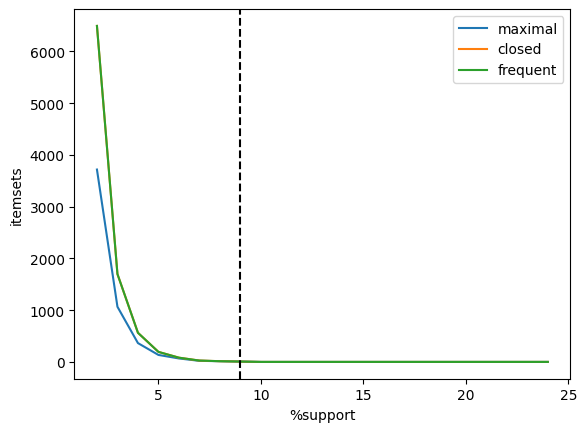

In [1145]:

len_max_it = []
len_cl_it = []
len_freq_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    freq_itemsets = apriori(X, target="s", supp=i, zmin=zmin, report="S")
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_freq_it.append(len(freq_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.plot(np.arange(2, max_supp), len_freq_it, label="frequent")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

# Determine the elbow point for SSE (you might have your own method to find this)
elbow_point = supp  # Replace this with the identified elbow point

# Plot a vertical line at the elbow point for SSE in the first plot
plt.axvline(x=elbow_point, color='black', linestyle='--', label=f'Elbow Point: {elbow_point}')

plt.show()


## Rules

In [1146]:
supp = 10
conf = 50
zmin = 3

In [1147]:

len_r = []
min_sup = 10
max_sup = 30
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup + 1, 5):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf + 1, 10):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)


In [1148]:
df_conf_supp = pd.DataFrame(len_r, columns=[50, 60, 70, 80, 90], index=[10, 15, 20, 25, 30])

df_conf_supp


,50,60,70,80,90
10,1075,343,131,29,5
15,187,62,22,3,0
20,22,6,2,0,0
25,0,0,0,0,0
30,0,0,0,0,0


In [1149]:
df_conf_supp.to_csv('df_conf_supp.csv')

In [1150]:

rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
404,"LOW_LOUD (-49.532, -9.214]","(HIGH_ACOU (0.415, 0.996], HIGH_INST (0.377, 1...",1410,9.400000,0.922171,2.766514
436,"LOW_ENER (-0.001, 0.562]","(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",1406,9.373333,0.913580,2.735816
457,"LOW_ENER (-0.001, 0.562]","(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",1495,9.966667,0.911030,2.728179
469,"LOW_ENER (-0.001, 0.562]","(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",1392,9.280000,0.900971,2.698056
449,"LOW_ENER (-0.001, 0.562]","(HIGH_ACOU (0.415, 0.996], LOW_LOUD (-49.532, ...",1470,9.800000,0.900735,2.697351
...,...,...,...,...,...,...
35,"LOW_POP (-0.001, 24.0]","(MID_LIVE (0.107, 0.209], LOW_TEMP (-0.001, 10...",915,6.100000,0.502471,1.002803
511,"LOW_POP (-0.001, 24.0]","(HIGH_ACOU (0.415, 0.996], LOW_DANC (-0.001, 0...",862,5.746667,0.502038,1.001939
571,"LOW_POP (-0.001, 24.0]","(HIGH_LIVE (0.209, 0.994], MID_TEMP (109.646, ...",770,5.133333,0.501956,1.001774
1020,"LOW_POP (-0.001, 24.0]","(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",823,5.486667,0.501523,1.000912


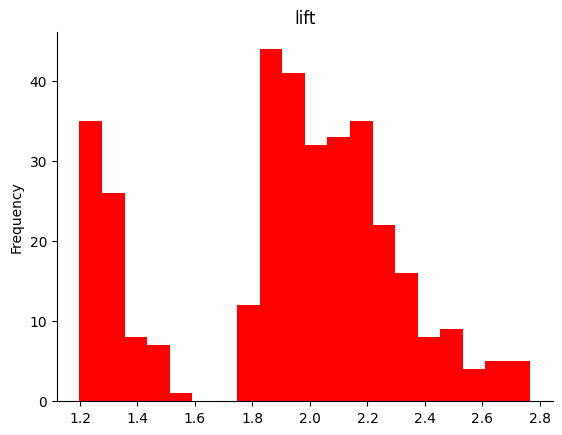

In [1151]:
from matplotlib import pyplot as plt
_df_19['lift'].plot(kind='hist', bins=20, title='lift', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

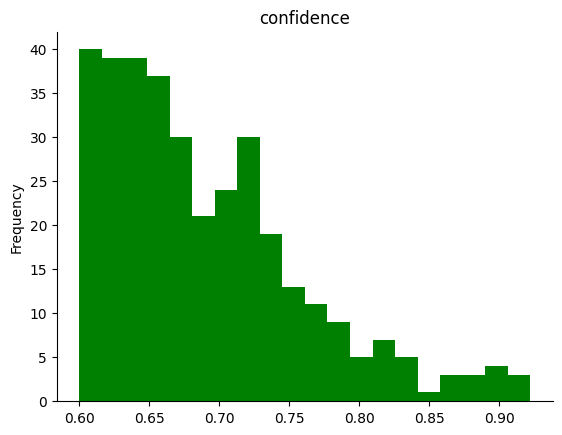

In [1152]:
from matplotlib import pyplot as plt
_df_18['confidence'].plot(kind='hist', bins=20, title='confidence', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1153]:
#rules_df.to_csv('rules_df.csv')

### Classification

In [1154]:
rules_high_pop = rules_df[(rules_df["consequent"] == "HIGH_POP (24.0, 94.0]") & (rules_df["lift"] > 1.4)]

rules_high_pop

,consequent,antecedent,abs_support,%_support,confidence,lift
523,"HIGH_POP (24.0, 94.0]","(HIGH_ACOU (0.415, 0.996], LOW_INST (-0.001, 1...",1355,9.033333,0.732037,1.467204
693,"HIGH_POP (24.0, 94.0]","(MID_LOUD (-9.214, -5.791], LOW_INST (-0.001, ...",1328,8.853333,0.715517,1.434094
1013,"HIGH_POP (24.0, 94.0]","(HIGH_TEMP (134.984, 220.525], LOW_INST (-0.00...",1303,8.686667,0.725097,1.453295
1046,"HIGH_POP (24.0, 94.0]","(LOW_INST (-0.001, 1.27e-05], LOW_ENER (-0.001...",1125,7.500000,0.742574,1.488324
1051,"HIGH_POP (24.0, 94.0]","(LOW_INST (-0.001, 1.27e-05], LOW_SPEE (-0.001...",1505,10.033333,0.775374,1.554062


In [1155]:
rules_high_pop.to_csv("rules_high_pop.csv" , index = False)

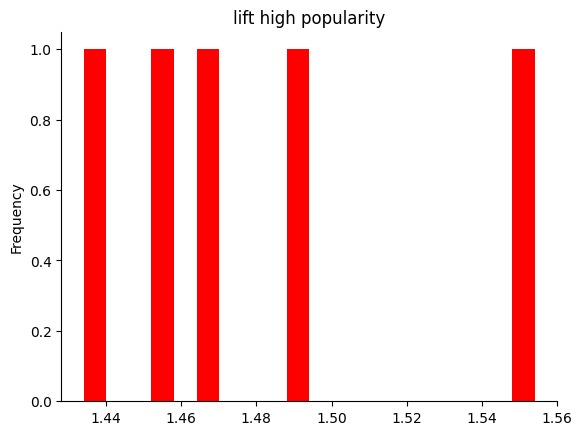

In [1156]:
from matplotlib import pyplot as plt
rules_high_pop['lift'].plot(kind='hist', bins=20, title='lift high popularity', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

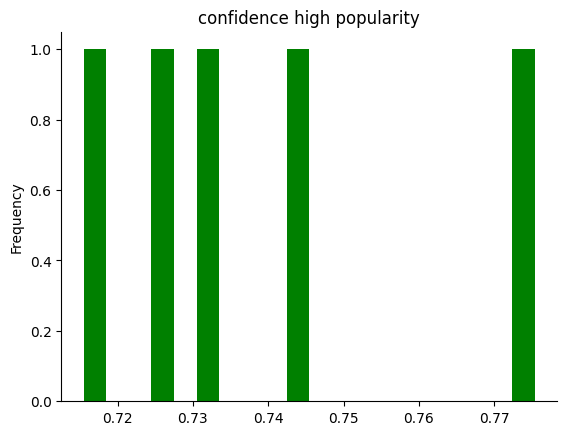

In [1157]:
from matplotlib import pyplot as plt
rules_high_pop['confidence'].plot(kind='hist', bins=20, title='confidence high popularity', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1158]:
rules_low_pop = rules_df[(rules_df["consequent"] == "LOW_POP (-0.001, 24.0]") & (rules_df["lift"] > 1.38)]

rules_low_pop

,consequent,antecedent,abs_support,%_support,confidence,lift
192,"LOW_POP (-0.001, 24.0]","(HIGH_ENER (0.834, 1.0], HIGH_INST (0.377, 1.0])",1139,7.593333,0.723175,1.443270
198,"LOW_POP (-0.001, 24.0]","(HIGH_ENER (0.834, 1.0], HIGH_DURA (265257.667...",1297,8.646667,0.701081,1.399177
255,"LOW_POP (-0.001, 24.0]","(HIGH_ENER (0.834, 1.0], LOW_VALE (-0.001, 0.2...",1059,7.060000,0.701325,1.399663
761,"LOW_POP (-0.001, 24.0]","(HIGH_INST (0.377, 1.0], HIGH_DURA (265257.667...",1596,10.640000,0.746143,1.489109
811,"LOW_POP (-0.001, 24.0]","(HIGH_INST (0.377, 1.0], LOW_ACOU (-0.001, 0.0...",1495,9.966667,0.721525,1.439978


In [1159]:
rules_low_pop.to_csv("rules_low_pop.csv" , index = False)

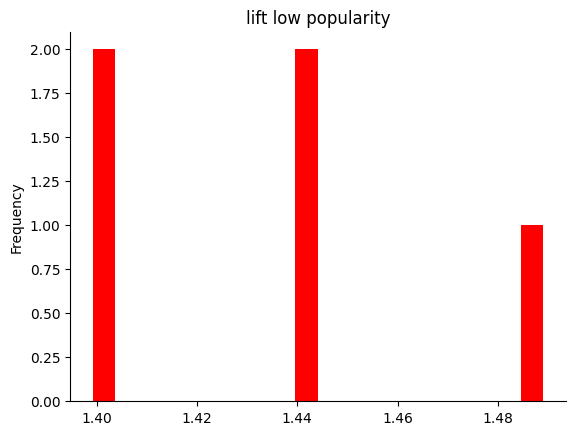

In [1160]:
from matplotlib import pyplot as plt
rules_low_pop['lift'].plot(kind='hist', bins=20, title='lift low popularity', color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

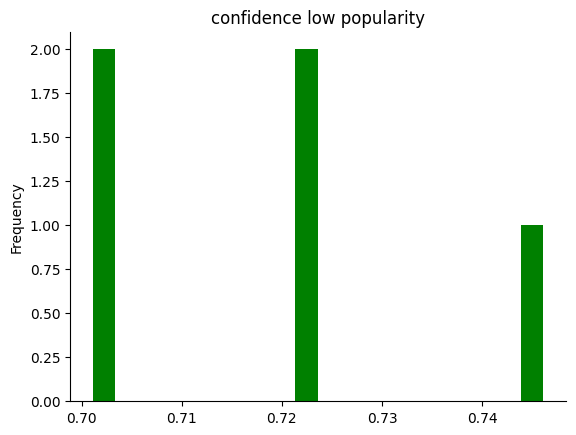

In [1161]:
from matplotlib import pyplot as plt
rules_low_pop['confidence'].plot(kind='hist', bins=20, title='confidence low popularity', color = "green")
plt.gca().spines[['top', 'right',]].set_visible(False)

## FP-Growth

In [1162]:
from fim import fpgrowth

In [1163]:
# supp = 2  # 2%
#supp = 20  # 20%
#zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(LOW_ENER (-0.001, 0.562], LOW_SPEE (-0.001, 0...",10.306667
1,"(LOW_INST (-0.001, 1.27e-05], LOW_SPEE (-0.001...",10.033333
2,"(LOW_INST (-0.001, 1.27e-05], MID_ACOU (0.0316...",10.206667
3,"(LOW_DANC (-0.001, 0.496], LOW_VALE (-0.001, 0...",11.886667
4,"(LOW_DANC (-0.001, 0.496], LOW_ENER (-0.001, 0...",10.940000
5,"(HIGH_INST (0.377, 1.0], LOW_VALE (-0.001, 0.2...",11.213333
6,"(HIGH_INST (0.377, 1.0], LOW_DANC (-0.001, 0.4...",11.760000
7,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",11.786667
8,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",12.373333
9,"(LOW_LOUD (-49.532, -9.214], LOW_ENER (-0.001,...",11.040000


In [1164]:

rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,"HIGH_POP (24.0, 94.0]","(LOW_SPEE (-0.001, 0.0412], LOW_LIVE (-0.001, ...",958,6.386667,0.582017,1.166523
1,"HIGH_POP (24.0, 94.0]","(MID_DANC (0.496, 0.657], LOW_SPEE (-0.001, 0....",1294,8.626667,0.626331,1.255340
2,"LOW_POP (-0.001, 24.0]","(MID_ENER (0.562, 0.834], LOW_LIVE (-0.001, 0....",926,6.173333,0.503261,1.004379
3,"HIGH_POP (24.0, 94.0]","(MID_ENER (0.562, 0.834], LOW_SPEE (-0.001, 0....",1151,7.673333,0.623848,1.250364
4,"HIGH_POP (24.0, 94.0]","(MID_ENER (0.562, 0.834], MID_DANC (0.496, 0.6...",981,6.540000,0.566724,1.135872
...,...,...,...,...,...,...
1070,"HIGH_ACOU (0.415, 0.996]","(MID_LIVE (0.107, 0.209], LOW_LOUD (-49.532, -...",1290,8.600000,0.680021,2.042514
1071,"HIGH_ACOU (0.415, 0.996]","(MID_LIVE (0.107, 0.209], LOW_TEMP (-0.001, 10...",967,6.446667,0.531027,1.594995
1072,"HIGH_POP (24.0, 94.0]","(MID_LIVE (0.107, 0.209], MID_VALE (0.269, 0.5...",950,6.333333,0.542237,1.086793
1073,"HIGH_POP (24.0, 94.0]","(MID_LIVE (0.107, 0.209], HIGH_DANC (0.657, 0....",794,5.293333,0.519634,1.041489


In [1165]:
rules_df[rules_df["consequent"] == "HIGH_POPU (35.0, 94.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [1166]:
rules_df[rules_df["consequent"] == "MID_POPU (18.0, 35.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [1167]:
rules_df[rules_df["consequent"] == "LOW_POPU (-0.001, 18.0]"]

,consequent,antecedent,abs_support,%_support,confidence,lift
